### Apa itu Neural Network?
Neural network (jaringan saraf tiruan) adalah model komputasi yang terinspirasi oleh cara kerja otak manusia. Ia terdiri dari lapisan-lapisan neuron buatan yang dihubungkan melalui bobot (weights). Jaringan ini dilatih menggunakan data untuk mengenali pola dan melakukan tugas seperti klasifikasi, regresi, dan prediksi.

### Contoh Penerapan Neural Network
1. **Pengenalan Gambar**: Neural network digunakan dalam **Computer Vision** untuk mengklasifikasikan objek dalam gambar. Misalnya, model Convolutional Neural Networks (CNN) sangat efektif dalam mendeteksi wajah, objek, atau bahkan kendaraan di foto.
  
2. **Pengenalan Suara**: Digunakan dalam **Natural Language Processing (NLP)** dan **Speech Recognition** untuk mentranskripsikan suara manusia menjadi teks, seperti yang diterapkan di asisten virtual seperti Siri atau Google Assistant.

### Framework Python yang Dipakai
1. **PyTorch**
   - **Kelebihan**:
     - Sangat **fleksibel** dan intuitif untuk penelitian dan pengembangan karena mendukung eksekusi dinamis (dynamic computation graph).
     - Banyak digunakan di kalangan akademisi dan peneliti karena **kemudahan debugging**.
   - **Kekurangan**:
     - Sedikit lebih rumit untuk digunakan dalam **produksi skala besar** dibandingkan dengan TensorFlow.
   
2. **TensorFlow + Keras**
   - **Kelebihan**:
     - **Keras** adalah API tingkat tinggi di atas TensorFlow, yang membuatnya mudah dipelajari dan digunakan untuk pemula.
     - Mendukung **deployment** di berbagai platform, termasuk mobile dan web, dengan alat seperti TensorFlow Lite dan TensorFlow.js.
   - **Kekurangan**:
     - Meskipun Keras mudah digunakan, debugging **lebih sulit** karena TensorFlow menggunakan eksekusi grafik statis (static computation graph).




# EDA

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mushroom_cleaned.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


 ## Dataset adalah data jamur yang dimana bertujuan untuk  memprediksi kelas jamur berdasarkan fitur-fitur numerik yang ada.

In [82]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [83]:
df.shape

(54035, 9)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [85]:
df.duplicated().sum()

303

In [86]:
df_new = df.drop_duplicates()

In [87]:
df_new.sum()

,0
cap-diameter,3.055358e+07
cap-shape,2.152450e+05
gill-attachment,1.151400e+05
gill-color,3.946400e+05
stem-height,4.041194e+04
stem-width,5.679476e+07
stem-color,4.542510e+05
season,5.117014e+04
class,2.937200e+04


In [88]:
df_new.value_counts()

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  stem-width  stem-color  season    class
0             6          0                11          1.019047     21          12          0.943195  1        1
696           0          0                4           2.900257     1642        11          0.943195  1        1
              5          1                3           0.565442     1177        6           0.888450  1        1
                                                      0.684812     1281        6           0.888450  1        1
                                                      0.748476     1076        6           0.943195  1        1
                                                                                                             ..
356           2          0                3           0.465967     302         6           0.943195  0        1
                                          4           0.110986     615         11          0.888450  0        1
                                          10          0.601253     784         11          0.888450  1        1
                         1                6           0.072047     602         11          1.804273  0        1
1891          4          4                10          3.413547     3164        11          0.943195  0        1
Name: count, Length: 53732, dtype: int64

Text(0, 0.5, 'Stem-Height(Average)')

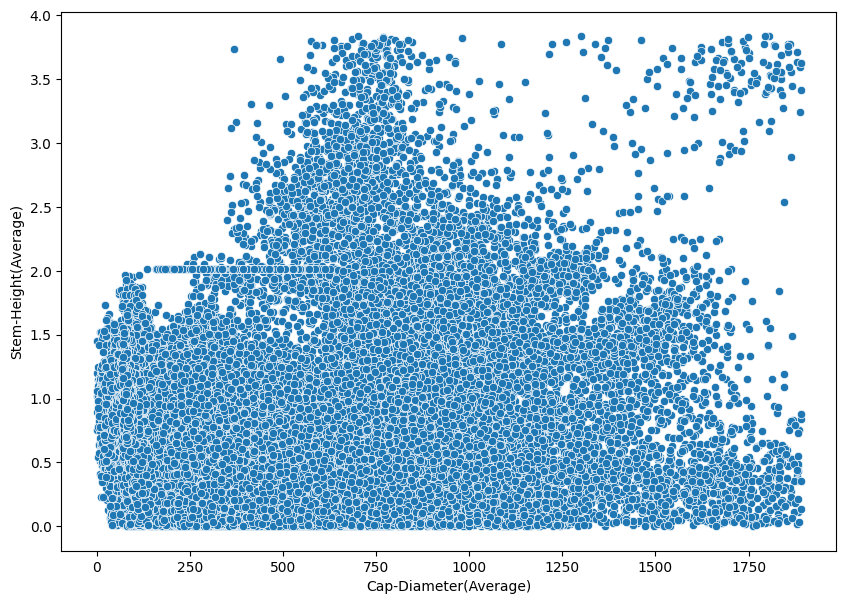

In [89]:
plt.figure(figsize= (10,7))
sns.scatterplot(x ='cap-diameter',y='stem-height', data =df_new)
plt.xlabel('Cap-Diameter(Average)')
plt.ylabel('Stem-Height(Average)')


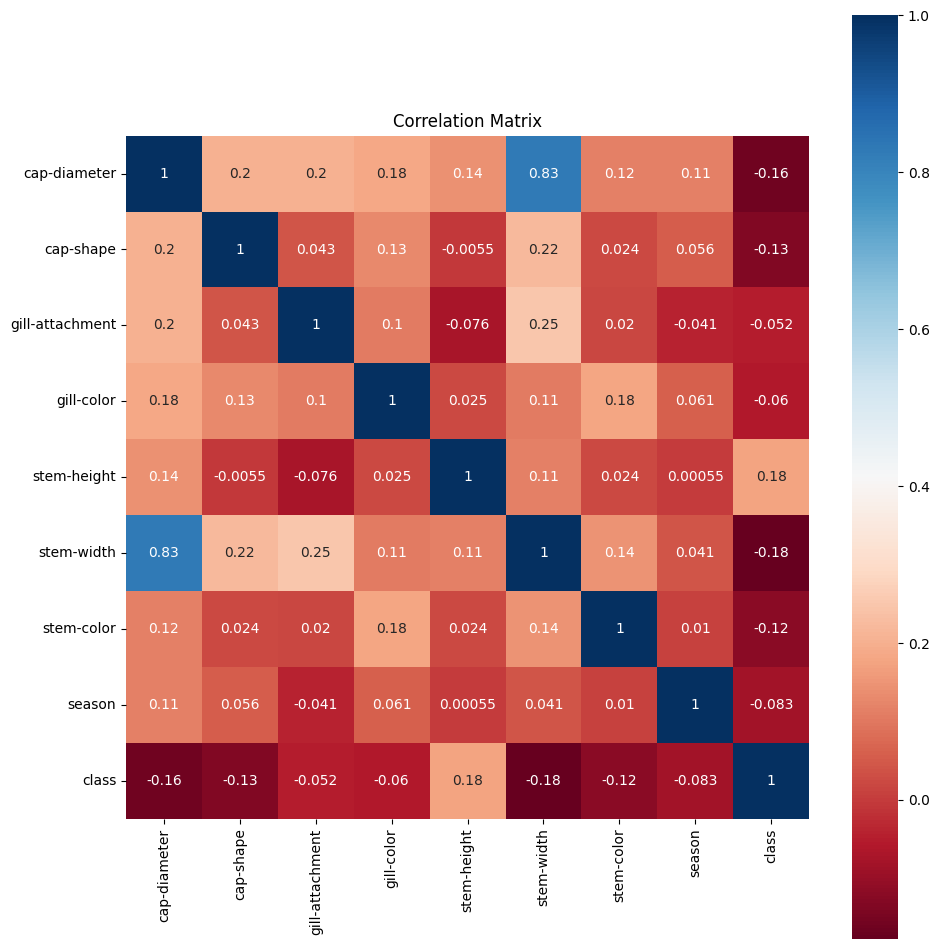

In [90]:
corr = df_new.corr()
plt.subplots(figsize=(10,10));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()

## Data Split Train, Test & Validation

In [91]:
from sklearn.model_selection import train_test_split
x = df_new.drop(columns=['class'], axis = 1)
y= df_new['class']

train_val_size = round(len(df) * 0.9)
x_test, y_test = x.iloc[train_val_size:], y.iloc[train_val_size:]
x , y = x.iloc[:train_val_size], y.iloc[:train_val_size]

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=80)

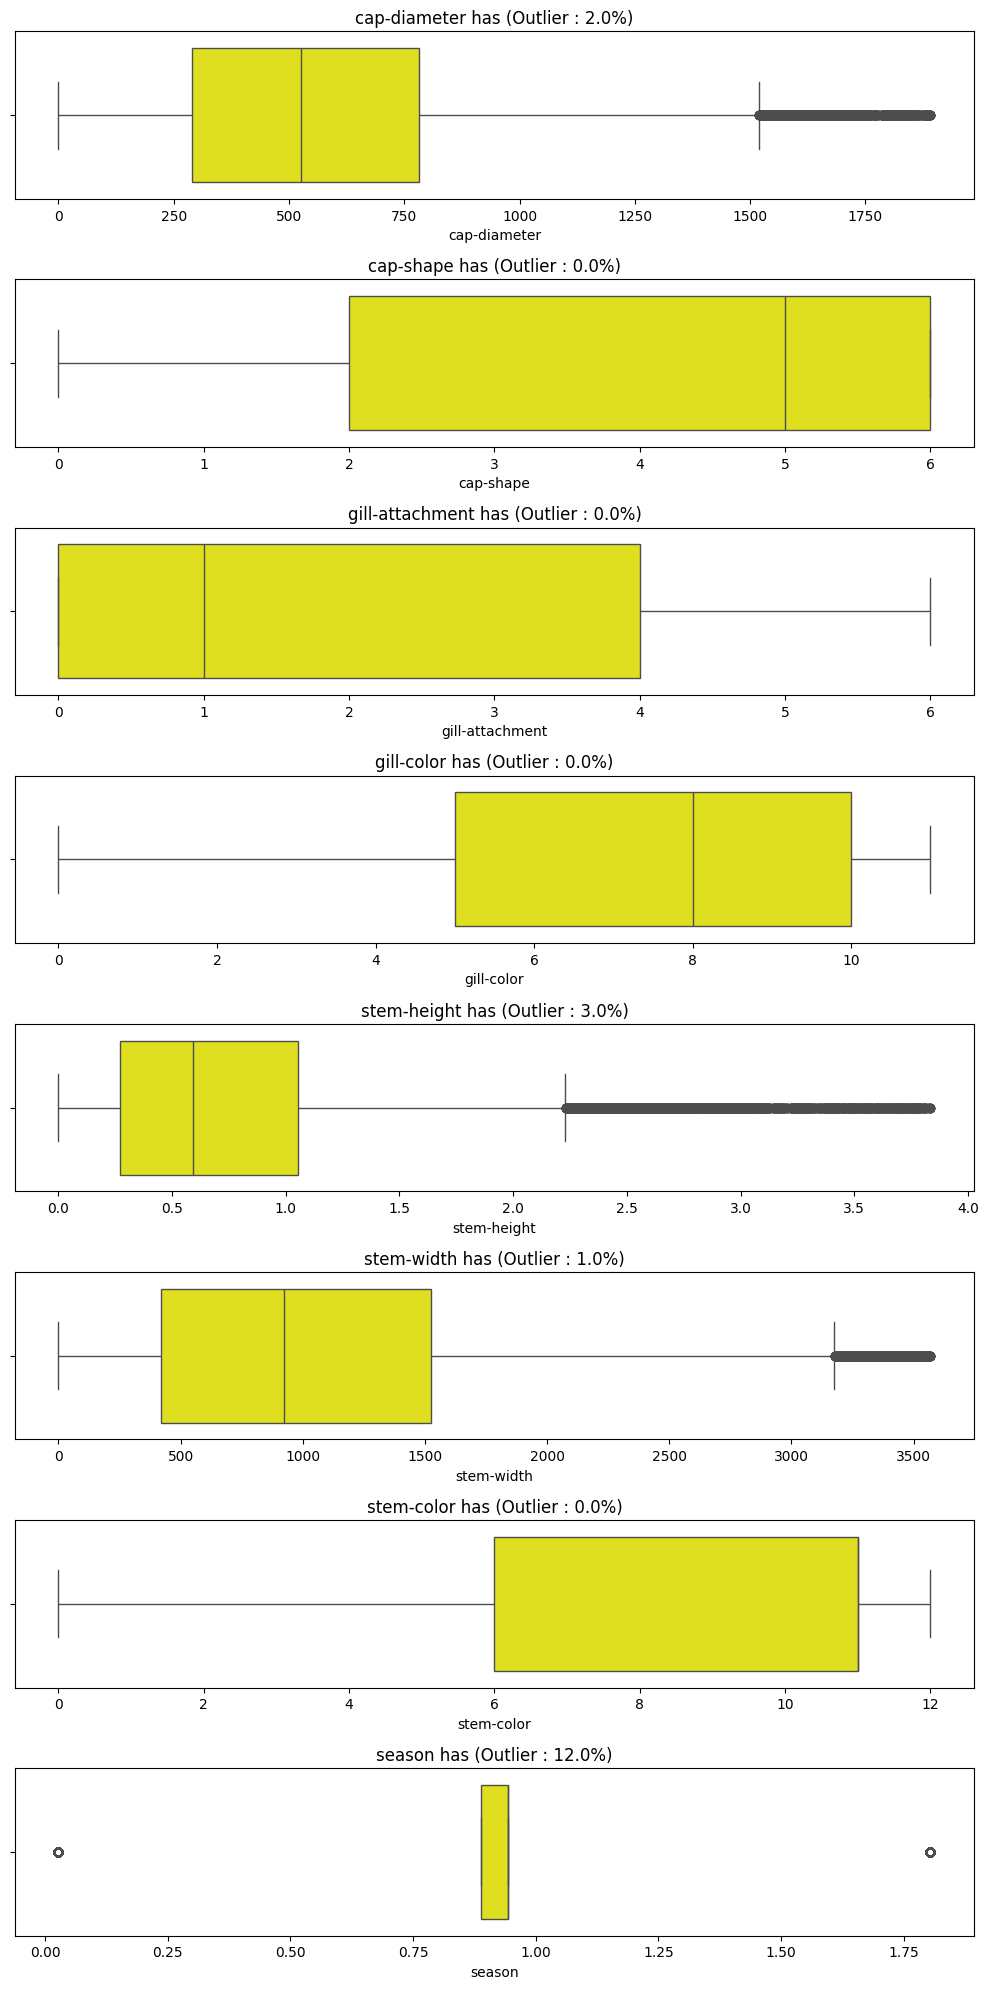

In [92]:
#Mencari outlier
def outlier(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    q1 = q1 - (iqr * 1.5)
    q3 = q3 + (iqr * 1.5)

    outlier = len(data[((data[column] > q3) | (data[column] < q1))]) / len(data)

    return round(outlier,2) * 100

col = df.columns
num_col = col.drop(['class'])

# Changed the number of rows to match the number of numerical columns
fig,axes = plt.subplots(8,1,figsize = (10,20))

for i in range(len(num_col)):
    name_col = num_col[i]
    total_outlier = outlier(df, name_col)
    title = f'{name_col} has (Outlier : {total_outlier}%)'
    sns.boxplot(data = df, x = name_col,ax = axes[i], color = 'yellow').set_title(title)

fig.tight_layout()

In [93]:
def is_outlier(x,upper,lower):
    return (x > upper) or x < lower

#remove outlier in every column
def remove_outlier(data,column,alternative_value):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    q1 = q1 - (iqr * 1.5)
    q3 = q3 + (iqr * 1.5)

    outlier_ps = len(data[((data[column] > q3) | (data[column] < q1))]) / len(data)

    if outlier_ps > 0 :
        data[column] = data[column].apply(lambda x : alternative_value if is_outlier(x,q3,q1) else x )

    return data[column]

outlier_data = ['cap-diameter','stem-height','stem-width','season']

for col in outlier_data :
    alternative_value = x_train[col].median()
    x_train[col] = remove_outlier(x_train,col,alternative_value)
    x_val[col] = remove_outlier(x_val,col,alternative_value)
    x_test[col] = remove_outlier(x_test,col,alternative_value)

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform='pandas')
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12)
x_train,y_train = smote.fit_resample(x_train,y_train)

## Model 1

In [96]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.callbacks import  EarlyStopping

input_shape = x.shape[1]

#building model
model = Sequential([
    Dense(8, input_shape = (input_shape,)),
    Dense(input_shape*2 , activation='relu'),
    Dense(input_shape*2 , activation='relu'),
    Dense(2, activation='sigmoid')
])

loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer = 'Adam' , loss = loss, metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522 (2.04 KB)

 Trainable params: 522 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', patience=1, baseline=0.8)]
model.fit(x_train, y_train_encoded, validation_data = (x_val, y_val_encoded), batch_size = 16, epochs = 3,callbacks = callbacks)

Epoch 1/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.6106 - loss: 0.6579 - val_accuracy: 0.6595 - val_loss: 0.6091
Epoch 2/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6744 - loss: 0.5964 - val_accuracy: 0.7058 - val_loss: 0.5577
Epoch 3/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7202 - loss: 0.5398 - val_accuracy: 0.7377 - val_loss: 0.5147


#### Callback yang dipakai yaitu EarlyStopping , dimana digunakan untuk menghentikan pelatihan model lebih awal jika metrik tertentu (dalam hal ini, akurasi validasi) tidak mengalami peningkatan setelah sejumlah epoch yang ditentukan.


#### Input Layer
##### Jumlah Neuron: Sama dengan jumlah fitur input (variabel independen) dari dataset (ada 8), kecuali fitur class.

#### Hidden Layer
1.  #### Layer 1 : 8 Neuron
2.  #### Layer 2: (input_shape * 2) (yang berarti dua kali jumlah fitur input) sehingga menjadi 16 Neuron
3.  #### Layer 3: (input_shape * 2) (yang berarti dua kali jumlah fitur input) sehingga menjadi 16 Neuron

#### Activation Function untuk Hidden Layer: ReLU
#### Optimizer : Adam
#### Nilai default dari optimizer Adam (0.001) digunakan, yang diatur secara otomatis.

#### Output Layer: 2 Neuron
#### Activation Function untuk Output Layer : Sigmoid

## Model modification

In [98]:
model_modif = Sequential([
    Dense(8, input_shape = (input_shape,)),
    Dense(input_shape*2 , activation='relu'),
    Dropout(0.3),
    Dense(input_shape*2 , activation='relu'),
    Dropout(0.3),
    Dense(input_shape*4 , activation='relu'),
    Dropout(0.4),
    Dense(input_shape*4 , activation='relu'),
    Dropout(0.4),
    Dense(2, activation='sigmoid')
])

losses = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model_modif.compile(optimizer = optimizer , loss = losses, metrics = ['accuracy'])
model_modif.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,154 (8.41 KB)

 Trainable params: 2,154 (8.41 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model_modif.fit(x_train, y_train_encoded, validation_data = (x_val, y_val_encoded), batch_size = 16, epochs = 3,callbacks = callbacks)

Epoch 1/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4981 - loss: 0.6973 - val_accuracy: 0.5670 - val_loss: 0.6914
Epoch 2/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5354 - loss: 0.6912 - val_accuracy: 0.6203 - val_loss: 0.6849


#### Input Layer
##### Jumlah Neuron: Sama dengan jumlah fitur input (variabel independen) dari dataset (ada 8), kecuali fitur class.

#### Hidden Layer
1.  #### Layer 1 : 8 Neuron
2.  #### Layer 2: (input_shape * 2) (yang berarti dua kali jumlah fitur input) sehingga menjadi 16 Neuron  dengan dropout Rate : 0.3
3.  #### Layer 3: (input_shape * 2) (yang berarti dua kali jumlah fitur input) sehingga menjadi 16 Neuron  dengan dropout Rate : 0.3
4. #### Layer 4: (input_shape * 4) (yang berarti empat kali jumlah fitur input) sehingga menjadi 32 Neuron  dengan dropout Rate : 0.4
5. #### Layer 5: (input_shape * 4) (yang berarti empat kali jumlah fitur input) sehingga menjadi 32 Neuron  dengan dropout Rate : 0.4

#### Activation Function untuk Hidden Layer: ReLU
#### Optimizer : SGD
#### Nilai default dari optimizer SGD (0.01) digunakan, dimana memiliki nilai lebih tinggi dibandingkan dengan default Adam, yang dapat mempercepat pelatihan

#### Output Layer: 2 Neuron
#### Activation Function untuk Output Layer : Sigmoid

In [100]:
from sklearn.metrics import classification_report

y_pred1 = np.argmax(model.predict(x_test),axis = 1)
y_pred2 = np.argmax(model_modif.predict(x_test),axis = 1)

print('The First model')
print(classification_report(y_test,y_pred1))

print('The Second model')
print(classification_report(y_test,y_pred2))

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The First model
              precision    recall  f1-score   support

           0       0.62      0.92      0.74      1962
           1       0.93      0.65      0.76      3138

    accuracy                           0.75      5100
   macro avg       0.77      0.78      0.75      5100
weighted avg       0.81      0.75      0.75      5100

The Second model
              precision    recall  f1-score   support

           0       0.89      0.24      0.38      1962
           1       0.67      0.98      0.80      3138

    accuracy                           0.70      5100
   macro avg       0.78      0.61      0.59      5100
weighted avg       0.76      0.70      0.64      5100



In [104]:
from sklearn.metrics import classification_report, accuracy_score

# Get predictions
y_pred1 = np.argmax(model.predict(x_test), axis=1)
y_pred2 = np.argmax(model_modif.predict(x_test), axis=1)

# Generate classification reports
report1 = classification_report(y_test, y_pred1, output_dict=True)
report2 = classification_report(y_test, y_pred2, output_dict=True)

# Extract metrics for comparison
metrics = ['precision', 'recall', 'f1-score'] # Removed 'accuracy'

# Create a DataFrame to compare metrics
comparison_df = pd.DataFrame(index=metrics)

# Populate the DataFrame with model performance metrics
comparison_df['Model 1'] = [report1['weighted avg'][metric] for metric in metrics]
comparison_df['Model 2'] = [report2['weighted avg'][metric] for metric in metrics]

# Add accuracy separately
comparison_df.loc['accuracy'] = [report1['accuracy'], report2['accuracy']]

# Display the comparison
print("Model Comparison:")
print(comparison_df)


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Comparison:
            Model 1   Model 2
precision  0.737152  0.756601
recall     0.675686  0.696863
f1-score   0.677474  0.638401
accuracy   0.675686  0.696863


Epoch 1/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7420 - loss: 0.5085 - val_accuracy: 0.7543 - val_loss: 0.4875
Epoch 2/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7541 - loss: 0.4906 - val_accuracy: 0.7650 - val_loss: 0.4687
Epoch 3/3
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7610 - loss: 0.4745 - val_accuracy: 0.7664 - val_loss: 0.4612


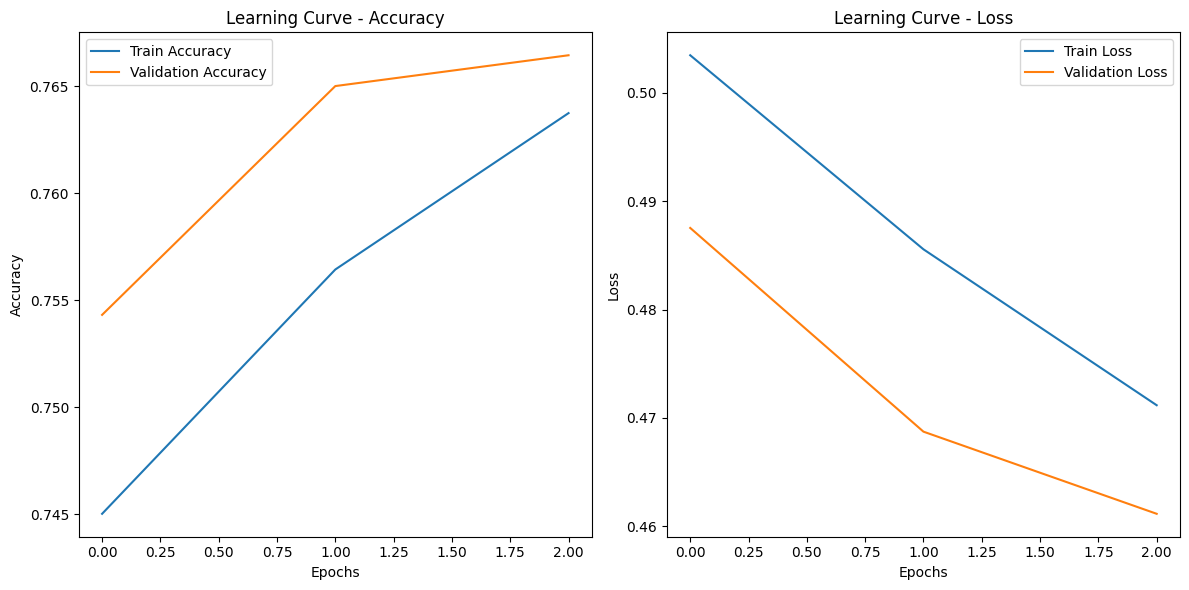

In [101]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function after training your model
history = model.fit(x_train, y_train_encoded, validation_data=(x_val, y_val_encoded), batch_size=16, epochs=3, callbacks=callbacks)

plot_learning_curve(history)
